# Lesson 09 - Data Visualisation
## By 呂伯駿 (Po Chun)

在開始之前，幫我先寫下面那段程式碼，測試你有沒有裝一些待會要用的套件

In [2]:
# test.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print('import success')

import success


如果你有裝Anaconda，通常不會跳錯誤。
如果跳錯誤的話： 可以裝一下

In [ ]:
# 如果你有裝 Anaconda
conda install pandas numpy matplotlib

# 如果你沒有裝 Anaconda
pip install pandas numpy matplotlib

今天早上你應該會學到
- Pandas: 一種常用來處理資料的 package
- Matplotlib: 一種常用來做視覺化，繪製圖表的 package 
- numpy: 一種常用來做數學運算的package，這個在 AI 很常用。

這些 package 的基本用法

## 開始! 🐌

## 1. Pandas 能做到什麼？
- 你在 excel 中能做到的大部分他都能做到
    - 匯入 CSV檔
    - 建立表格，選取欄位
    - 處理空值
    - 查看統計數字
    - 排序，計算欄位平均值，相關係數...
    - ...

### 先安裝，如果剛才你沒有裝的話

In [ ]:
# 如果你有裝Anaconda，跑下面這一行
conda install pandas

# 如果你沒有裝Anaconda，跑下面這一行
pip install pandas

### 在使用之前，你需要先知道 pandas 有兩種結構

- Series：通常拿來處理一維資料，如時間序列。
- Dataframe：有點像Table，用來處理 csv 這種列有索引，欄有標籤的二維資料。

##### 其實還有第三種叫 Panel，通常處理三維的資料，但較少用因此這裡先不提。

### 先講 Series
#### 建立方式

In [13]:
import pandas as pd
# 若不加後面的index，則index預設是0,1,2,3...
pets = ['Labrador Retriever', 'Beagle', 'Dachshund', 'Shiba Inu']
pets_index = ['Alex', 'Alice', 'Neo', 'Kenny']
series_1 =  pd.Series(pets,index=pets_index)
print(type(series_1))
print(series_1)

<class 'pandas.core.series.Series'>
Alex     Labrador Retriever
Alice                Beagle
Neo               Dachshund
Kenny             Shiba Inu
dtype: object


In [37]:
# 資料選取方式
# 使用上，你可以使用index 或是 key name來選取
print(series_1[0])
print('--')
print(series_1[[0,1,2]])
print('--')
print(series_1['Alex'])
print('--')
print(series_1[['Alex','Alice']])

Labrador Retriever
--
Alex     Labrador Retriever
Alice                Beagle
Neo               Dachshund
dtype: object
--
Labrador Retriever
--
Alex     Labrador Retriever
Alice                Beagle
dtype: object
--------------
Alice    Beagle
dtype: object
--------------
Neo      Dachshund
Kenny    Shiba Inu
dtype: object


In [41]:
# 也可以像這樣選取連續資料，因此說是序列的
print(series_1[1:2]) # 從第2個到第3個
print('--------------')
print(series_1[:'Neo']) #從第一個 ~ Neo

Alice    Beagle
dtype: object
--------------
Alex     Labrador Retriever
Alice                Beagle
Neo               Dachshund
dtype: object


### Series 跟一般的list比起來有何好處？

In [13]:
# 1. 可以直接對兩個Series做加減乘除
price = pd.Series([15,20,40,10])
counts = pd.Series([1,3,5,6])
total_price = price*counts
print(total_price)

0     15
1     60
2    200
3     60
dtype: int64


In [ ]:
# 2. 運行速度快

### 接著講 Dataframe

#### 建立方式

In [48]:
import pandas as pd

pm25 = [55.4800251788,55.4800551787,55.4160551788,55.4300551788,55.2800551788]
pm10 = [81.6167142157,21.3467142857,81.5467144857,61.6467142857,31.7467142857]
dict = {'pm25': pm25,'pm10':pm10}
df = pd.DataFrame(dict)
print(df)

        pm10       pm25
0  81.616714  55.480025
1  21.346714  55.480055
2  81.546714  55.416055
3  61.646714  55.430055
4  31.746714  55.280055


In [49]:
# 如果你的資料本身已經是 二維矩陣 你也可以這樣建立
import pandas as pd

table = [
    [52.4800551788,83.6467142857],
    [51.4800551788,85.6467142857],
    [59.4800551788,87.6467142857],
    [55.4800551788,89.6467142857],
    [57.4800551788,80.6467142857]
]
df = pd.DataFrame(table,columns = ['pm25','pm10'])
print(df)
print('------')
print(df['pm25'])
print(df.iloc[0,1]) # 選取第一列，第二欄的數值

        pm25       pm10
0  52.480055  83.646714
1  51.480055  85.646714
2  59.480055  87.646714
3  55.480055  89.646714
4  57.480055  80.646714
------
0    52.480055
1    51.480055
2    59.480055
3    55.480055
4    57.480055
Name: pm25, dtype: float64
83.6467142857


### pandas 能直接對資料做排序
透過 .sort_values 與 .sort_index 處理

In [62]:
import pandas as pd

table = [
    [52.4800551788,83.6467142857],
    [51.4800551788,85.6467142857],
    [59.4800551788,87.6467142857],
    [55.4800551788,89.6467142857],
    [57.4800551788,80.6467142857]
]
df = pd.DataFrame(table,columns = ['pm25','pm10'])
df.sort_values(by = 'pm25',ascending=False) # ascending 可調整升降冪

,pm25,pm10
2,59.480055,87.646714
4,57.480055,80.646714
3,55.480055,89.646714
0,52.480055,83.646714
1,51.480055,85.646714


### pandas 也可以直接從網路上讀取資料

In [68]:
# 臺南市健康促進醫院一覽表
url = 'http://data.tainan.gov.tw/dataset/1b89994d-ab2a-4126-ab1e-ed1a0cfaeb27/resource/f169b4d7-11d7-400e-b061-249cf9a2bf34/download/1070612tnhp.csv'
data = pd.read_csv(url, encoding='utf-8')
print(type(data))

<class 'pandas.core.frame.DataFrame'>


### 而 Pandas 也提供幾種常用的方法來查看你的資料

.shape: 回傳列，欄數。 e.g. (8,7) <br>
.info: 回傳資料 <br>
.describe(): 回傳統計數字 <br>
.columns: 回傳所有欄位名稱 
.index: 回傳索引值，如 0~8 <br>
.head(): 取前面幾行資料 <br>
.tail(): 取後面幾行資料 <br>

以上面的臺南市健康促進醫院一覽表為例 

In [34]:
data.info

<bound method DataFrame.info of      參與類別                  機構名稱              機構地址  負責人           電話  \
0  健康醫院認證             衛生福利部臺南醫院     臺南市中西區中山路125號  許博翔   06-2200055   
1  健康醫院認證             衛生福利部新營醫院      臺南市新營區信義街73號  王裕煒   06-6351131   
2  健康醫院認證             衛生福利部胸腔病院     台南市仁德區中山路864號  潘秋宜   06-2705911   
3  健康醫院認證            衛生福利部嘉南療養院     台南市仁德區裕忠路539號  鄭靜明   06-2795019   
4  健康醫院認證  台南市立醫院(委託秀傳醫療社團法人經營)    台南市東區崇德路 670 號  戴芳楟  06-2609926    
5  健康醫院認證        奇美醫療財團法人佳里奇美醫院  台南市佳里區興化里佳里興606號  周偉倪   06-7263333   
6  健康醫院認證       奇美醫療財團法人柳營奇美醫院    台南市柳營區太康里太康201號  黃順賢  06-622-6999   
7  健康醫院認證                  永川醫院     台南市中西區成功路169號  蘇祐達   06-2245771   

          緯度          經度  
0  22.996071  120.208878  
1  23.308923  120.313312  
2  22.973720  120.244054  
3  22.976788  120.242017  
4  22.968706  120.226813  
5  23.181669  120.183792  
6  23.289918  120.329240  
7  22.998097  120.206279  >

In [32]:
data.describe()

,緯度,經度
count,8.000000,8.000000
mean,23.086737,120.244298
std,0.148580,0.051617
min,22.968706,120.183792
25%,22.976021,120.208228
50%,22.997084,120.234415
75%,23.208731,120.261369
max,23.308923,120.329240


### 有時(常常)外部拿到的資料會有空值，Pandas 亦可以用來判斷資料是否存在空值，並加以處理
判斷空值:<br>
.isnull() <br>
.notnull() <br>

處理空值: <br>
.dropna() 把有空值的那一列資料砍掉<br>
.fillna() 用其他數值把空值補上

In [3]:
# np.nan 是從 numpy 來的，意思是空值，這裡可以先不管他。
table = [
    ['A', 'Noah', 90],
    ['B', 'Liam', 81],
    ['C', 'William', np.nan],
    ['B', 'Benjamin.', 82],
    ['A', 'Emma.', 90],
    ['C', 'Olivia', np.nan],
    ['A', 'Isabella', 70],
    ['C', 'Amelia', np.nan],
    ['B', 'Mia', 88],
]
df = pd.DataFrame(table,columns = ['class','name','score'])
print(df.loc[:,'score'].isnull()) # 列出每一列是不是有空值

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8    False
Name: score, dtype: bool


In [82]:
# np.nan 是從 numpy 來的，意思是空值。
table = [
    ['A', 'Noah', 90],
    ['B', 'Liam', 81],
    ['C', 'William', np.nan],
    ['B', 'Benjamin.', 82],
    ['A', 'Emma.', 90],
    ['C', 'Olivia', np.nan],
    ['A', 'Isabella', 70],
    ['C', 'Amelia', np.nan],
    ['B', 'Mia', 88],
]
df = pd.DataFrame(table,columns = ['class','name','score'])
new_df = df.fillna(df['score'].mean()) # 把空值用平均分數補上
# or new_df = df.fillna({'score': df['score'].mean()}) 也可以選擇哪些欄位要用什麼資料填補空值

print(new_df)

  class       name  score
0     A       Noah   90.0
1     B       Liam   81.0
2     C    William   83.5
3     B  Benjamin.   82.0
4     A      Emma.   90.0
5     C     Olivia   83.5
6     A   Isabella   70.0
7     C     Amelia   83.5
8     B        Mia   88.0


### Exercise 1.1 (計分練習)

嘗試透過閱讀 [pandas 文件](http://pandas.pydata.org/pandas-docs/stable/)來了解 groupby的用法，
並印出下列各班級的分數平均值與分數總和 (A班平均多少，總分多少，B班平均...)

In [64]:
table = [
    ['A', 'Noah', 90],
    ['B', 'Liam', 81],
    ['C', 'William', 87],
    ['B', 'Benjamin.', 82],
    ['A', 'Emma.', 90],
    ['C', 'Olivia', 50],
    ['A', 'Isabella', 70],
    ['C', 'Amelia', 84],
    ['B', 'Mia', 88],
]
df = pd.DataFrame(table,columns = ['class','name','score'])
# print(something) total score
# print(something) mean score

### References

1. [[Python] Pandas 基礎教學](https://oranwind.org/python-pandas-ji-chu-jiao-xue/)<br>
2. [Pandas 基本介绍](https://morvanzhou.github.io/tutorials/data-manipulation/np-pd/3-1-pd-intro/)<br>
3. [[資料分析&機器學習] 第2.3講：Pandas 基本function介紹](https://medium.com/@yehjames/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC2-3%E8%AC%9B-pandas-%E5%9F%BA%E6%9C%ACfunction%E4%BB%8B%E7%B4%B9-series-dataframe-selection-grouping-447a3fa90b60)<br>
4. [SITCON Pandas!資料處理與分析的利器!](https://drive.google.com/drive/u/0/folders/0B0UIQiTTYz0BWVJkOHJVVGNUNWs)

## 2. 接下來講 Matplotlib

他是一種用來資料視覺化的 python 套件，除了 Matplotlib之外，常見的還有 Seaborn。

- Matplotlib: 學習資源最多，繪圖功能最齊全
- Seaborn: 繪圖語法較簡單，圖表相較Matplotlib預設圖較好看。

### 你可以用 Matplotlib 畫出這些圖
<img src="https://i.imgur.com/GAP1OVL.png">
From [python-graph-gallery](https://python-graph-gallery.com/matplotlib/)

## Matplotlib 怎麼用？

### 一樣先安裝，如果你剛才沒有裝的話

In [ ]:
# 如果你有裝Anaconda，跑下面這一行
conda install pandas

# 如果你沒有裝Anaconda，跑下面這一行
pip install pandas

### Example 2.1，折線圖與散點圖

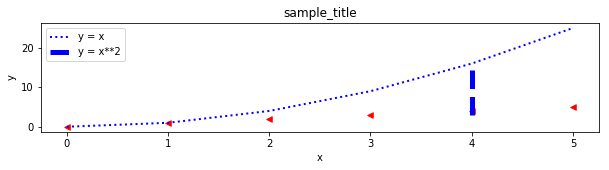

In [86]:
# 下面這一行的目的是讓matplotlib畫出的圖片能直接在 jupyter notebook 顯示，如果你在VS code加這行是沒有用的。
%matplotlib inline
import matplotlib.pyplot as plt

x = [0,1,2,3,4,5]
y1 = [0,1,2,3,4,5]
y2 = [0,1,4,9,16,25]

plt.figure(figsize=(10, 2)) # 尺寸 10*6
plt.scatter(x,y1, s=30, c='red', marker='<') # s: 點尺寸
plt.plot(x, y2, color='blue', linewidth=2.0, linestyle=':')
plt.plot([4, 4], [3, 16], 'b--', linewidth=5)  # b-- => color:blue & linestyle:'--'
plt.xlabel('x')
plt.ylabel('y')
plt.legend(["y = x", "y = x**2"], loc=2); # loc指的是legend要放的位置，loc=2是放在第二象限
plt.title('sample_title');
plt.show()

### Example 2.2，註解與連結線上資料

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
url = 'http://markets.financialcontent.com/stocks/action/gethistoricaldata?Month=12&Symbol=GOOG&Range=300&Year=2017'
google_stock = pd.read_csv(url)
google_stock.head()

,Symbol,Date,Open,High,Low,Close,Volume,Change,% Change
0,GOOG,12/29/17,NaN,1046.0,1046.0,1046.0,0,-1.74,-0.17%
1,GOOG,12/28/17,1052.0,1055.0,1045.0,1048.0,834645,-1.23,-0.12%
2,GOOG,12/27/17,1057.0,1058.0,1048.0,1049.0,1271896,-7.37,-0.70%
3,GOOG,12/26/17,1058.0,1060.0,1050.0,1057.0,761208,-3.38,-0.32%
4,GOOG,12/22/17,1061.0,1064.0,1059.0,1060.0,755095,-3.51,-0.33%


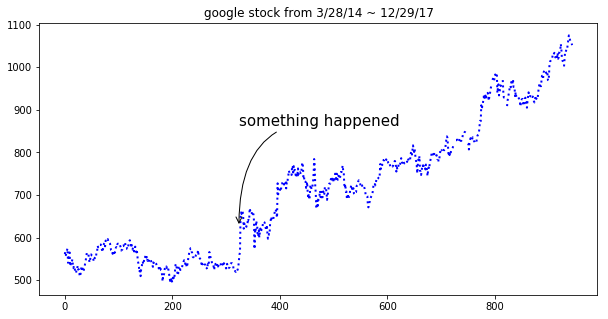

In [145]:
new_google_stock = google_stock.iloc[::-1] # 因為收到的資料是從 12/29/17 開始到 03/28/14，因此要轉個方向。
plt.figure(figsize=(10, 5))
plt.plot(range(0,new_google_stock.shape[0]), new_google_stock['Open'], color='blue', linewidth=2.0, linestyle=':')
plt.annotate(
    s='something happened', xy=(324, 627), xycoords='data', xytext=(0, +100), fontsize=15,
    textcoords='offset points',arrowprops=dict(arrowstyle='->', connectionstyle="angle3,angleA=0,angleB=90")
)
plt.title('google stock from 3/28/14 ~ 12/29/17');
plt.show()

## Exercise 2.1 (計分)

請透過閱讀 [Matplotlib 文件](https://www.google.com.tw/search?rlz=1C5CHFA_enTW728TW728&ei=8_hIW_nKI5Ci-Qa24LzwDw&q=fill+between+matplotlib&oq=fill+between+matplotlib&gs_l=psy-ab.3..35i39k1j0l2j0i22i30k1l7.2401.2532.0.2991.2.2.0.0.0.0.115.190.1j1.2.0....0...1c.1.64.psy-ab..0.2.190....0.tyqgTUaRDkg)，了解 fill_between 的用法後，嘗試用google股價繪出下圖
底色區域的上邊界是 high price, 下邊界是 low price, 中間線是 open price

Reference: [Gallery_1](https://matplotlib.org/gallery.html#lines_bars_and_markers), [Gallery_2](https://matplotlib.org/gallery/index.html), [Gallery_3](https://python-graph-gallery.com/)<br>
如果畫完的話，可以看看上面的 Gallery。 或是了解一下 subplot 的用法
<img src="https://i.imgur.com/Wf312W1.png">

In [149]:
# Sample code
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
url = 'http://markets.financialcontent.com/stocks/action/gethistoricaldata?Month=12&Symbol=GOOG&Range=300&Year=2017'
google_stock = pd.read_csv(url)
new_google_stock = google_stock.iloc[::-1] # 因為收到的資料是從 12/29/17 開始到 03/28/14，因此要轉個方向。
new_google_stock = new_google_stock[:30] # 為了讓區域便明顯，我們只看前面30天的資料

plt.figure(figsize=(10, 5))
# magic line
# another magic line
plt.show()

<Figure size 720x360 with 0 Axes>

### Reference
- [為什麼用 Matplotlib](https://morvanzhou.github.io/tutorials/data-manipulation/plt/1-1-why/)

## 3. 那 numpy 又是幹嘛的？



In [ ]:
np.random
np.array
np.linspace(-3, 3, 50)
np.arctan2(Y,X) 
np.arange(n